Câu 1: (2 điểm)Xét hàm số $f(x)=(x-2)^{4}+0.5(x+1)^{2}$. Viết đạo hàm bậc nhất, bậc hai và chạy Newton từ nhiều điểm khởi tạo. Vẽ đồ thị ID kèm các điểm lặp.   
CAU 1: Ham f(x) = (x-2)^4 + 0.5*(x+1)^2   
Dao ham 1: $f'(x) = 4*(x-2)^3 + (x+1)$  
Dao ham 2: $f''(x) = 12*(x-2)^2 + 1 > 0 (ham loi)$  
Phuong phap Newton: $x^{k+1} = x^k - f'(x^k)/f''(x^k)$  

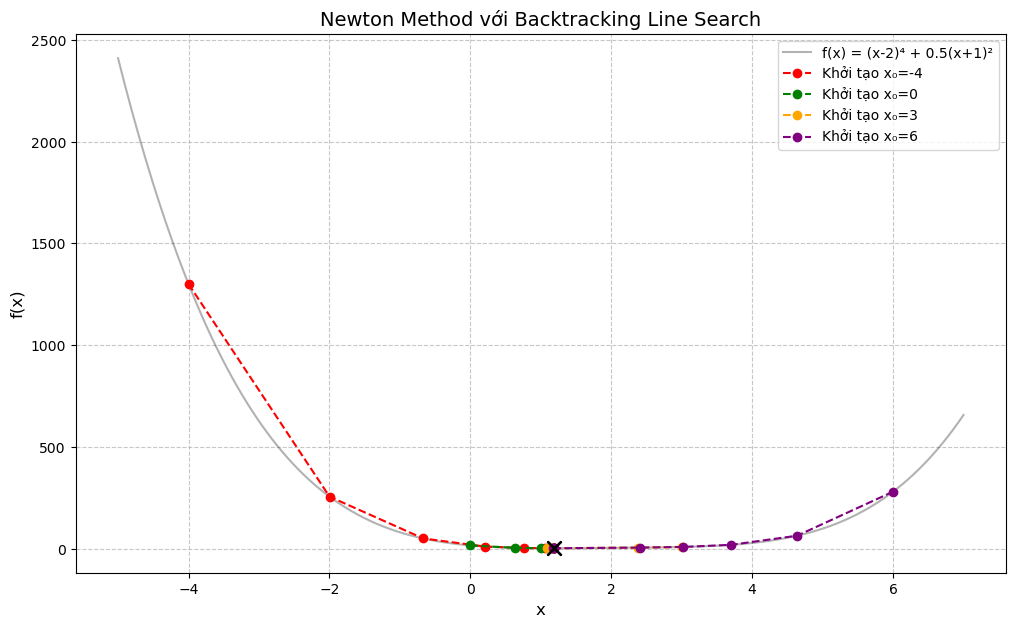

------------------------------------------------------------
   x0 |         x* |      f(x*) |  Số bước lặp
------------------------------------------------------------
 -4.0 |   1.182817 |   2.828286 |            9
  0.0 |   1.182817 |   2.828286 |            6
  3.0 |   1.182817 |   2.828286 |            6
  6.0 |   1.182817 |   2.828286 |            8


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Định nghĩa hàm số và các đạo hàm
def f(x):
    return (x - 2)**4 + 0.5*(x + 1)**2

def f_prime(x):
    return 4*(x - 2)**3 + (x + 1)

def f_double_prime(x):
    return 12*(x - 2)**2 + 1

# 2. Thuật toán Newton kết hợp Backtracking Line Search
def newton_with_backtracking(x0, tol=1e-6, max_iter=100, alpha=1.0, beta=0.5, c=1e-4):
    """
    alpha: Bước nhảy ban đầu
    beta: Hệ số giảm bước nhảy (0 < beta < 1)
    c: Tham số điều kiện Armijo
    """
    x_values = [x0]
    curr_x = x0
    
    for _ in range(max_iter):
        grad = f_prime(curr_x)
        hessian = f_double_prime(curr_x)
        
        # Hướng tìm kiếm Newton
        delta_x = -grad / hessian
        
        # Backtracking Line Search (Tìm bước nhảy t phù hợp)
        t = alpha
        while f(curr_x + t * delta_x) > f(curr_x) + c * t * grad * delta_x:
            t = beta * t
            
        # Cập nhật x mới
        new_x = curr_x + t * delta_x
        x_values.append(new_x)
        
        # Điều kiện dừng
        if abs(new_x - curr_x) < tol:
            break
        curr_x = new_x
        
    return np.array(x_values)

# 3. Chạy thử nghiệm với các điểm khởi tạo khác nhau
starting_points = [-4, 0, 3, 6]
paths = [newton_with_backtracking(x0) for x0 in starting_points]

# 4. Vẽ đồ thị
x_range = np.linspace(-5, 7, 500)
y_range = f(x_range)

plt.figure(figsize=(12, 7))
plt.plot(x_range, y_range, 'k-', alpha=0.3, label='f(x) = (x-2)⁴ + 0.5(x+1)²')

colors = ['red', 'green', 'orange', 'purple']
for i, (path, c) in enumerate(zip(paths, colors)):
    plt.plot(path, f(path), 'o--', color=c, label=f'Khởi tạo x₀={starting_points[i]}')
    # Đánh dấu điểm cuối cùng (cực tiểu)
    plt.scatter(path[-1], f(path[-1]), color='black', marker='x', s=100, zorder=5)

plt.title('Newton Method với Backtracking Line Search', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. In kết quả hội tụ
print("-" * 60)
print(f"{'x0':>5} | {'x*':>10} | {'f(x*)':>10} | {'Số bước lặp':>12}")
print("-" * 60)
for x0, path in zip(starting_points, paths):
    print(f"{x0:>5.1f} | {path[-1]:>10.6f} | {f(path[-1]):>10.6f} | {len(path)-1:>12}")

Câu 2: (4 điểm) Cho ma trận $$P=\begin{bmatrix}1&0\\ 0&4\end{bmatrix}$$và vector $q=(-1;4).$ Xét bài toán tối ưu sau $$min_{x\in\mathbb{R}^{2}}f(x)=\frac{1}{2}x^{T}Px+q^{T}x+\frac{5}{2}.$$ (1) 
a. (2 điểm) Xác định điểm tối ưu $x^{*}$ và giá trị tối ưu $p^{*}$ của bài toán (1).  

b. (1 điểm) Chuyển bài toán (1) về bài toán least square (bình phương tối thiểu) sau bằng cách chỉ ra ma trận A và vector b. $$min_{x\in\mathbb{R}^{2}}\frac{1}{2}||Ax-b||_{2}^{2}$$(2) Biết rằng A là ma trận đường chéo và vector b có các thành phần là các số thực dương.   
c. (1 điểm) Sử dụng thuật toán Gradient Descent cho bài toán trên (bài toán (1) hoặc (2)), với giá trị x ban đầu là $x^{(0)}=(-1;2)$, sử dụng learning rate lần lượt là 0.4 và 0.6 và thực hiện tối đa 100 vòng lặp. In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp k và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-p^{*}|$ trong cả hai trường hợp của learning rate. Từ đó hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate. 

In [4]:

P = np.array([[1,0],[0,4]])
q = np.array([-1,4])

# a) Điểm và giá trị tối ưu
x_star = -np.linalg.inv(P) @ q
p_star = 0.5 * x_star.T @ P @ x_star + q.T @ x_star + 2.5
print('Điểm tối ưu x* =', x_star)
print('Giá trị tối ưu p* =', p_star)

# b) Chuyển về dạng least squares
A = np.diag([1, -2])
b = np.array([1, 2])  # tất cả > 0
# Kiểm tra đạo hàm (gradient) của hàm bình phương tối thiểu tại x*
grad_ls = A.T @ (A @ x_star - b)
print("Đạo hàm LS tại x* =", grad_ls)



Điểm tối ưu x* = [ 1. -1.]
Giá trị tối ưu p* = 0.0
Đạo hàm LS tại x* = [0. 0.]


In [5]:
def object_function(x):
    return 0.5 * x.T @ P @ x + q.T @ x + 2.5

def gradient(x):
    return P @ x + q

def gradient_descent(learning_rate, max_iterations, init_x):
    x = init_x
    x_values = [x]
    f_values = [object_function(x)]

    for i in range(max_iterations):
        x = x - learning_rate*gradient(x)
        x_values.append(x)
        f_values.append(object_function(x))
        print(f'lần lặp thứ {i+1}: x = {x_values[-1]} và f(x) = {f_values[-1]}')
    return x_values,f_values
    
lr1  = 0.4
lr2 = 0.6
max_iter = 100
x0 = np.array([-1, 2])

x_values1, f_values1 = gradient_descent(lr1, max_iter, x0)  
print('='*100)
x_values1, f_values2 = gradient_descent(lr2, max_iter, x0)  

lần lặp thứ 1: x = [-0.2 -2.8] và f(x) = 7.200000000000005
lần lặp thứ 2: x = [0.28 0.08] và f(x) = 2.5920000000000023
lần lặp thứ 3: x = [ 0.568 -1.648] và f(x) = 0.9331199999999997
lần lặp thứ 4: x = [ 0.7408 -0.6112] và f(x) = 0.3359232000000003
lần lặp thứ 5: x = [ 0.84448 -1.23328] và f(x) = 0.12093235200000008
lần lặp thứ 6: x = [ 0.906688 -0.860032] và f(x) = 0.0435356467200001
lần lặp thứ 7: x = [ 0.9440128 -1.0839808] và f(x) = 0.015672832819199733
lần lặp thứ 8: x = [ 0.96640768 -0.94961152] và f(x) = 0.005642219814911975
lần lặp thứ 9: x = [ 0.97984461 -1.03023309] và f(x) = 0.0020311991333685775
lần lặp thứ 10: x = [ 0.98790676 -0.98186015] và f(x) = 0.0007312316880132563
lần lặp thứ 11: x = [ 0.99274406 -1.01088391] và f(x) = 0.0002632434076845769
lần lặp thứ 12: x = [ 0.99564644 -0.99346965] và f(x) = 9.476762676685624e-05
lần lặp thứ 13: x = [ 0.99738786 -1.00391821] và f(x) = 3.411634563610377e-05
lần lặp thứ 14: x = [ 0.99843272 -0.99764908] và f(x) = 1.228188442903288

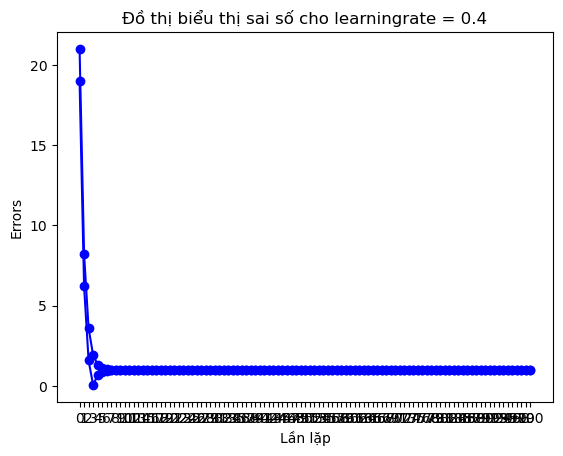

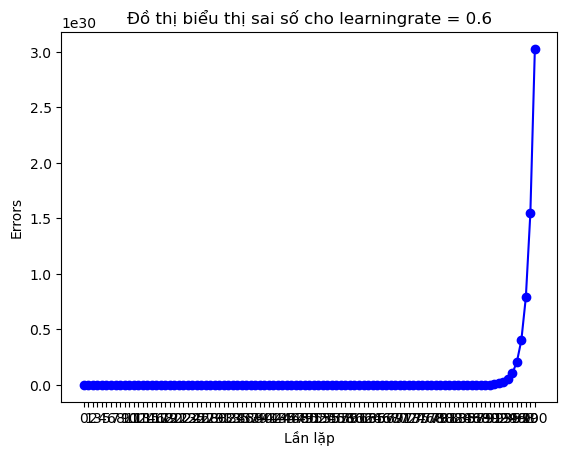

In [7]:
errors1 = [abs(f - x_star) for f in f_values1]
errors2 = [abs(f - p_star) for f in f_values2]
plt.title('Đồ thị biểu thị sai số cho learningrate = 0.4')
plt.plot(range(max_iter + 1), errors1, c='b', marker='o')
plt.xticks(range(max_iter + 1))
plt.xlabel('Lần lặp')
plt.ylabel('Errors')
plt.show()


plt.title('Đồ thị biểu thị sai số cho learningrate = 0.6')
plt.plot(range(max_iter + 1), errors2, c='b', marker='o')
plt.xticks(range(max_iter + 1))
plt.xlabel('Lần lặp')

plt.ylabel('Errors')
plt.show()

Kết luận: Với α=0.4, GD hội tụ nhanh đến x* (sai số giảm bậc 1). Với α=0.6, phân kỳ vì vượt ngưỡng ổn định (α > 2/λ_max). Chọn α nhỏ để đảm bảo hội tụ.

Câu 3: (4 điểm)Cho ma trận $$U=\begin{bmatrix}1&-2\\ 2&-4\end{bmatrix}$$và vector $w=(2;2)$.Xét bài toán tối ưu có điều kiện ràng buộc của bài toán (1) như sau (ma trận P và vector q được cho ở Câu 1) $$min_{x=(x_{1},x_{2})\in\mathbb{R}^{2}}f(x)=\frac{1}{2}x^{T}Px+q^{T}x+\frac{5}{2}.$$subject to $$Ux-w=0$$ 
a. (2 điểm) Gọi $x^{*}$ và $v^{*}$ lần lượt là điểm tối ưu của bài toán trên và bài toán đối ngẫu của nó, viết điều kiện Karush-Kuhn-Tucker (KKT) cho $x^{*}$ và $v^{*}$.  
b. (2 điểm) Tìm một cặp giá trị của $(x^{*},v^{*})$ thoả điều kiện KKT vừa tìm được ở câu b), từ đó đưa ra giá trị tối ưu cho bài toán trên.

In [8]:
import numpy as np

# ======================
# DỮ LIỆU BÀI TOÁN
# ======================
P = np.array([[1., 0.],
              [0., 4.]])        # ma trận P (giống Câu 1)
q = np.array([-1., 4.])         # vector q (giống Câu 1)
c = 2.5                         # hằng số 5/2

# Ràng buộc Ux = w
U = np.array([[2., 1.],
              [-2., 4.]])       # ma trận U
w = np.array([2., 2.])          # vector w

# ======================
# a) VIẾT HỆ KKT
# KKT:
# [ P   U^T ] [ x ] = [ -q ]
# [ U    0  ] [ v ]   [  w ]
# ======================

K = np.block([
    [P, U.T],
    [U, np.zeros((2, 2))]
])
rhs = np.hstack([-q, w])

# ======================
#  GIẢI HỆ PHƯƠNG TRÌNH KKT
# ======================
sol = np.linalg.solve(K, rhs)
x_star = sol[:2]   # nghiệm tối ưu x*
v_star = sol[2:]   # nghiệm đối ngẫu v*

#  TÍNH GIÁ TRỊ TỐI ƯU
p_star = 0.5 * x_star.T @ P @ x_star + q.T @ x_star + c

#  KIỂM TRA ĐIỀU KIỆN KKT
grad_check = P @ x_star + q + U.T @ v_star     # Stationarity
cons_check = U @ x_star - w                    # Primal feasibility

print("Điểm tối ưu x* =", x_star)
print("Bộ nhân Lagrange v* =", v_star)
print("Giá trị tối ưu p* =", p_star)

print("\n--- KIỂM TRA ĐIỀU KIỆN KKT ---")
print("P x* + q + U^T v* =", grad_check)
print("U x* - w =", cons_check)


Điểm tối ưu x* = [0.6 0.8]
Bộ nhân Lagrange v* = [-1.28 -1.48]
Giá trị tối ưu p* = 6.5600000000000005

--- KIỂM TRA ĐIỀU KIỆN KKT ---
P x* + q + U^T v* = [-1.11022302e-16  0.00000000e+00]
U x* - w = [0. 0.]
